In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import geopandas as gpd
import pyarrow.parquet as pq
import gc

In [28]:
# Read the .dta file
# file_path = r"C:\Users\alezi\Downloads\final_database.dta"
# data = pd.read_stata(file_path)
# # Eliminate the '-' in the id_vessel column
# # data['id_vessel'] = data['id_vessel'].str.replace('-', '')


# ids = pd.read_csv(r"C:\Users\alezi\OneDrive\Escritorio\Master_Thesis\data_out\vessel_id_leng_ton.csv")
# ids.rename(columns={'id':'id_vessel'}, inplace=True)

In [2]:
# Define a function to extract whatever element of the vessel column
def extract_char(vessel, pos):
    if isinstance(vessel, str):
        return vessel.split(', ')[pos].strip()
    else:
        return None


In [5]:
# Import world map
world = gpd.read_file(r"C:\Users\alezi\OneDrive\Escritorio\Master_Thesis\data_in\world-administrative-boundaries\world-administrative-boundaries.shp")

# Filter the countries of interest
countries = ['FRA', 'ESP', 'BEL', 'NOR', 'DEU', 'SWE', 'IRL', 'DNK', 'NLD', 'GBR']

world = world[world['iso3'].isin(countries)]

### Import Fishing Data

In [4]:
# Import the data
fishing_1 = pd.read_excel(r"C:\Users\alezi\OneDrive\Escritorio\Master_Thesis\data_out\fishing\final_fishing_part1.xlsx")
fishing_2 = pd.read_excel(r"C:\Users\alezi\OneDrive\Escritorio\Master_Thesis\data_out\fishing\final_fishing_part2.xlsx")
# fishing_3 = pd.read_excel(r"C:\Users\alezi\OneDrive\Escritorio\Master_Thesis\data_out\fishing\final_fishing_part3.xlsx")
# fishing_4 = pd.read_excel(r"C:\Users\alezi\OneDrive\Escritorio\Master_Thesis\data_out\fishing\final_fishing_part4.xlsx")

fishing = pd.concat([fishing_1, fishing_2], axis=0, ignore_index=True).reset_index(drop=True)

In [12]:
# Apply the function to extract the vessel type
fishing['flag'] = fishing['vessel'].apply(lambda x: extract_char(x, 1))
fishing['id_vessel'] = fishing['vessel'].apply(lambda x: extract_char(x, 0))

# Set the 'start' and end date of the dataset as datetime
fishing['start'] = pd.to_datetime(fishing['start'])
fishing['end'] = pd.to_datetime(fishing['end'])

# Create 6 columns. One for the year_start, month_start, day_start and year_end, month_end, day_end
fishing['year_start'] = fishing['start'].dt.year
fishing['month_start'] = fishing['start'].dt.month
fishing['day_start'] = fishing['start'].dt.day
fishing['year_end'] = fishing['end'].dt.year
fishing['month_end'] = fishing['end'].dt.month
fishing['day_end'] = fishing['end'].dt.day

## There are observation with a year_start equal to 2014, 2015, 2016, 2017. We drop them
#print(fishing['year_start'].value_counts())
fishing = fishing[fishing['year_start'] >= 2018]


In [13]:
# Add the fishing dataset identifier value of fishing in a variable called dataset
fishing['dataset'] = 'fishing'
# Export data to .parquet
fishing.to_parquet(r"C:\Users\alezi\OneDrive\Escritorio\Master_Thesis\data_out\fishing\fishing.parquet")

C:\Users\alezi\AppData\Local\Temp\ipykernel_23652\1067421915.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fishing['dataset'] = 'fishing'


### Import Port Visit Data

In [14]:
# Import both datasets
# port_visit_1 = pd.read_excel(r"C:\Users\alezi\OneDrive\Escritorio\Master_Thesis\data_out\port_visits\final_events_part1.xlsx")
# port_visit_2 = pd.read_excel(r"C:\Users\alezi\OneDrive\Escritorio\Master_Thesis\data_out\port_visits\final_events_part2.xlsx")

# port_visits = pd.concat([port_visit_1, port_visit_2], axis=0, ignore_index=True).reset_index(drop=True)
port_visits = pd.read_excel(r"C:\Users\alezi\OneDrive\Escritorio\Master_Thesis\data_out\port_visits\final_port_visits.xlsx")

In [16]:
# Apply the functions to the dataframe
port_visits['flag'] = port_visits['vessel'].apply(lambda x: extract_char(x, 1))
port_visits['id_vessel'] = port_visits['vessel'].apply(lambda x: extract_char(x, 0))
port_visits['type_vessel'] = port_visits['vessel'].apply(lambda x: extract_char(x, -2))
port_visits['port_country'] = port_visits['event_info'].apply(lambda x: extract_char(x, 6))


# Set the 'start' and end date of the dataset as datetime
port_visits['start'] = pd.to_datetime(port_visits['start'])
port_visits['end'] = pd.to_datetime(port_visits['end'])

# Create 6 columns. One for the year_start, month_start, day_start and year_end, month_end, day_end
port_visits['year_start'] = port_visits['start'].dt.year
port_visits['month_start'] = port_visits['start'].dt.month
port_visits['day_start'] = port_visits['start'].dt.day
port_visits['year_end'] = port_visits['end'].dt.year
port_visits['month_end'] = port_visits['end'].dt.month
port_visits['day_end'] = port_visits['end'].dt.day

## There are observation with a year_start equal to 2014, 2015, 2016, 2017. We drop them
#print(port_visits['year_start'].value_counts())
port_visits = port_visits[port_visits['year_start'] >= 2018]

In [19]:
port_visits[port_visits['flag'] != 'GBR'].id_vessel.nunique()

780

In [20]:
# Add the fishing dataset identifier value of fishing in a variable called dataset
port_visits['dataset'] = 'port_visits'
# Export
port_visits.to_parquet(r"C:\Users\alezi\OneDrive\Escritorio\Master_Thesis\data_out\port_visits\port_visits.parquet")

C:\Users\alezi\AppData\Local\Temp\ipykernel_23652\3752826530.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  port_visits['dataset'] = 'port_visits'


## Compute Distances

In [6]:
# Define a function to process Parquet files in chunks
def append_parquet_datasets(file1, file2, row_group_size=10000):
    # Initialize an empty DataFrame for the combined dataset
    combined_df = pd.DataFrame()

    # Helper function to read Parquet in chunks
    def read_parquet_in_chunks(file, row_group_size):
        parquet_file = pq.ParquetFile(file)
        num_row_groups = parquet_file.num_row_groups
        for i in range(num_row_groups):
            df_chunk = parquet_file.read_row_group(i).to_pandas()
            yield df_chunk

    # Read and append chunks from the first dataset
    for chunk in read_parquet_in_chunks(file1, row_group_size):
        combined_df = pd.concat([combined_df, chunk], ignore_index=True)
        del chunk
        gc.collect()  # Free up memory

    # Read and append chunks from the second dataset
    for chunk in read_parquet_in_chunks(file2, row_group_size):
        combined_df = pd.concat([combined_df, chunk], ignore_index=True)
        del chunk
        gc.collect()  # Free up memory

    return combined_df

In [7]:
# Path of the datasets
file1 = r"C:\Users\alezi\OneDrive\Escritorio\Master_Thesis\data_out\fishing\fishing.parquet"
file2 = r"C:\Users\alezi\OneDrive\Escritorio\Master_Thesis\data_out\port_visits\port_visits.parquet"

# Execute the function
combined_df = append_parquet_datasets(file1, file2)

In [8]:
# Sort the data based on the variables 'id_vessel' and 'start'
combined_df = combined_df.sort_values(['id_vessel', 'start']).reset_index(drop=True)

# I want to keep every port_visit that previously has a fishing event and only the fishing events that are followed by a port visit, by the same vessel
# I create a new column with the value of the next event
combined_df['next_event'] = combined_df.groupby('id_vessel')['dataset'].shift(-1)
combined_df['prev_event'] = combined_df.groupby('id_vessel')['dataset'].shift(1)

# Create a boolean condition for rows to keep
condition = ((combined_df['dataset'] == 'fishing') & (combined_df['next_event'] == 'port_visits')) | ((combined_df['dataset'] == 'port_visits') & (combined_df['prev_event'] == 'fishing'))
# Apply the condition to the dataframe
combined_df = combined_df[condition].drop(columns='next_event').reset_index(drop=True)

# Covert the dataframe to a geodataframe
combined_df = gpd.GeoDataFrame(combined_df, geometry=gpd.points_from_xy(combined_df.lon, combined_df.lat))
# Set the crs
combined_df.crs = "EPSG:4326"


In [9]:
# Create a dataset with the coordinates of each country
countries_coords = pd.DataFrame(columns=['country', 'lat', 'lon'])
countries_coords['country'] = countries

# Create a dictionary with the coordinates of each country
# España, puerto a coruña: 43.36239716897153, -8.384275652110508
# Alemania, puerto Hamburgo: 53.50841703169586, 9.972971582100827
# Francia, Puerto Saint Malo: 48.64328349407154, -2.0184663250121773
# Suecia, Puerto Gotemburgo: 57.70404406653085, 11.964425678411901
# Belgica, Puerto de Oostende: 51.22638229283341, 2.9321823173411588
# Noruega, Puerto de Terrak: 65.09141341156328, 12.92871422495859
# Dinamarca, Puerto de thyboron: 56.76697791797916, 8.402738593227122
# Holanda, Puerto de Ijmuiden: 52.48711532036018, 4.559662881801993
# We use centroid coordinates of the country for the islands (Irlanda and Gran Bretaña)

coords = {'FRA': [48.64328349407154, -2.0184663250121773], 'ESP': [43.36239716897153, -8.384275652110508],
          'BEL': [51.22638229283341, 2.9321823173411588], 'NOR': [65.09141341156328, 12.92871422495859],
          'DEU': [53.50841703169586, 9.972971582100827], 'SWE': [57.70404406653085, 11.964425678411901],
          'DNK': [56.76697791797916, 8.402738593227122], 'NLD': [52.48711532036018, 4.559662881801993]}

# Add the centroids of IRL and GBR using the world geodataframe
for country in ['IRL', 'GBR']:
    centroid = world[world['iso3'] == country].geometry.centroid
    coords[country] = [centroid.y.values[0], centroid.x.values[0]]
    
# Assign the coordinates to the dataframe
countries_coords['lat'] = countries_coords['country'].map(lambda x: coords[x][0])
countries_coords['lon'] = countries_coords['country'].map(lambda x: coords[x][1])

# Create a geoDataFrame with the coordinates of the countries
countries_gdf = gpd.GeoDataFrame(countries_coords, geometry=gpd.points_from_xy(countries_coords.lon, countries_coords.lat))
# Set the crs
countries_gdf.crs = "EPSG:4326"

C:\Users\alezi\AppData\Local\Temp\ipykernel_32912\1098002151.py:23: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = world[world['iso3'] == country].geometry.centroid
C:\Users\alezi\AppData\Local\Temp\ipykernel_32912\1098002151.py:23: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = world[world['iso3'] == country].geometry.centroid


In [10]:
# Function to calculate distance between a point and a country's point
def calculate_distance(point, country_point):
    return point.distance(country_point)

# Loop through each country in countries_gdf and compute distances
for idx, country in countries_gdf.iterrows():
    country_name = country['country'].lower().replace(' ', '_')  # Create a valid column name
    country_point = countries_gdf['geometry'].iloc[idx]  # Get the country's point
    
    # Compute the distance and add it as a new column
    combined_df[f'distance_to_{country_name}'] = combined_df.geometry.apply(lambda x: calculate_distance(x, country_point))



In [9]:
# combined_df.sample(1000).drop(columns=['start','end','year_start', 'month_start', 'year_end', 'month_end']).explore()

### Export Combined Dataset

In [11]:
# Export the data
data_to_export = combined_df[['flag','dataset' ,'id_vessel', 'type_vessel','geometry', 'year_start', 'month_start',
                              'day_start', 'year_end', 'month_end', 'day_end', 'port_country', 'distance_to_gbr',
                              'distance_to_fra', 'distance_to_esp', 'distance_to_bel', 'distance_to_nor',
                              'distance_to_deu', 'distance_to_swe', 'distance_to_irl', 'distance_to_dnk', 'distance_to_nld']]

# Identify distance columns
distance_columns = [col for col in data_to_export.columns if col.startswith('distance_to_')]

# Shift the distance columns where dataset is 'fishing'
shifted_distances = data_to_export[distance_columns].shift()

# Iterate over the DataFrame to update the distances
for index, row in data_to_export.iterrows():
    if row['dataset'] == 'port_visits':
        for col in distance_columns:
            data_to_export.at[index, col] = shifted_distances.at[index, col]

data_to_export = data_to_export[data_to_export['dataset'] != 'fishing']


# data_to_export.to_csv(r"C:\Users\alezi\OneDrive\Escritorio\Master_Thesis\data_out\final_events_w_distance.csv", index=False)


### Plots For The Thesis

In [ ]:
# Read the .dta file
# file_path = r"C:\Users\alezi\Downloads\final_database.dta"
# data_to_merge = pd.read_stata(file_path)
# data_to_merge = data_to_merge[['flag', 'id_vessel', 'year_start', 'port_country', 'date_start',
# #                                 'date_end', 'date_month', 'date_week',]]

# # data_to_plot = pd.read_parquet(r"C:\Users\alezi\OneDrive\Escritorio\Master_Thesis\data_out\data_to_plot.parquet")
# # Merge the data
# data_to_merge = pd.merge(data_to_merge, data_to_plot[['id_vessel', 'geometry']], on='id_vessel', how='left', indicator=True)

In [12]:
# Import final id list
final_id_list = pd.read_csv(r"C:\Users\alezi\OneDrive\Escritorio\Master_Thesis\data_out\unique_ids.csv")

# Import the data
# df = pd.read_parquet(r"C:\Users\alezi\OneDrive\Escritorio\Master_Thesis\data_out\data_to_plot.parquet")
# df = df.drop(columns=['geometry'])
# Filter the data
# df = df[df['id_vessel'].isin(final_id_list['id_vessel'])]
data_to_export = data_to_export[data_to_export['id_vessel'].isin(final_id_list['id_vessel'])]

# Filter by port_country
data_to_export = data_to_export[data_to_export['port_country'].isin(countries)]
# Set the geodataframe
gdf = data_to_export.copy()
 

In [48]:
# First filter the data
data = gdf[gdf['port_country'] == 'GBR']
data = data[data['year_start'].isin([2020, 2021])]
# Keep the observations that have a union with a buffered geometry of GBR (to avoid plotting points outside the country)
# Precompute the buffer around the UK territory
uk_geometry = world[world['iso3'] == 'GBR'].geometry.unary_union
uk_buffer = uk_geometry.buffer(0.5)

# Spatially index your observations
sindex = data.sindex

# Find observations that intersect the buffered UK geometry
possible_matches_index = list(sindex.intersection(uk_buffer.bounds))
possible_matches = data.iloc[possible_matches_index]

# Keep only the observations that actually intersect
data = possible_matches[possible_matches.intersects(uk_buffer)]

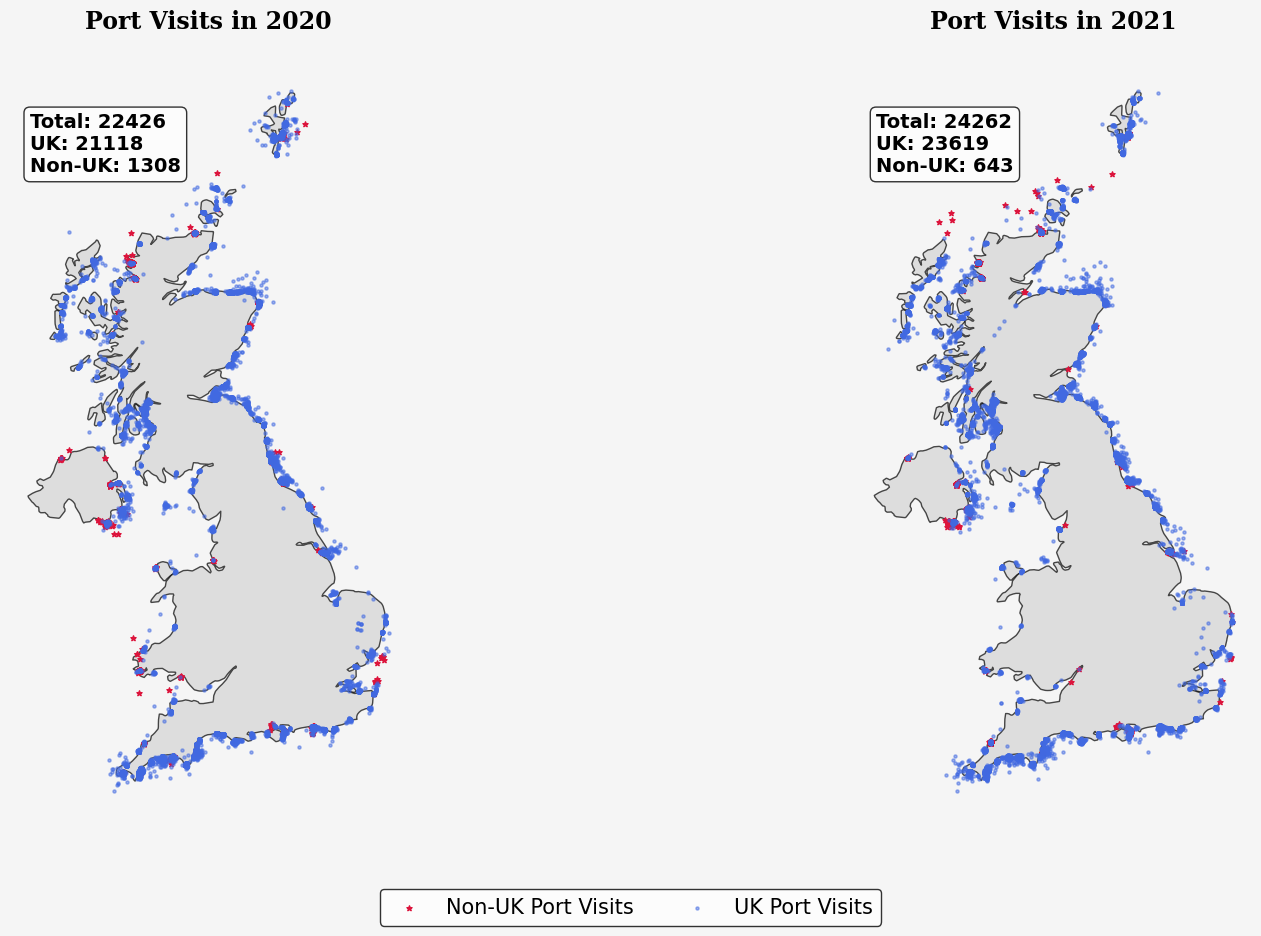

In [88]:
# Assuming 'world' and 'data' are already defined as GeoDataFrames

fig, ax = plt.subplots(1, 2, figsize=(20, 10), facecolor='whitesmoke')

# Define colors and fonts
uk_color = 'royalblue'
non_uk_color = 'crimson'
background_color = 'lightgrey'
title_font = {'fontsize': 20, 'fontweight': 'bold', 'family': 'serif'}
subtitle_font = {'fontsize': 17, 'fontweight': 'bold', 'family': 'serif'}

# Manually specified values for port visits
values = {
    2020: {'Total': 22426, 'UK': 21118, 'Non-UK': 1308},
    2021: {'Total': 24262, 'UK': 23619, 'Non-UK': 643}
}

for i, year in enumerate([2020, 2021]):
    # Plot UK territory
    world[world['iso3'] == 'GBR'].plot(ax=ax[i], color=background_color, edgecolor='black', alpha=0.7)
    
    # Plot port visits
    data[(data['year_start'] == year) & (data['flag'] != 'GBR')].plot(ax=ax[i], color=non_uk_color, markersize=15, alpha=1, label='Non-UK Port Visits', marker='*')
    data[(data['year_start'] == year) & (data['flag'] == 'GBR')].plot(ax=ax[i], color=uk_color, markersize=5, alpha=0.5, label='UK Port Visits', marker='o')
    
    # Set title and turn off axis
    ax[i].set_title(f"Port Visits in {year}", fontdict=subtitle_font, pad=20)
    ax[i].set_axis_off()
    
    # Annotate manually specified total port visits
    annotation = (f"Total: {values[year]['Total']}\n"
                  f"UK: {values[year]['UK']}\n"
                  f"Non-UK: {values[year]['Non-UK']}")
    ax[i].annotate(annotation, xy=(0.05, 0.85), xycoords='axes fraction', fontsize=14, fontweight='bold', 
                   bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white', alpha=0.8))

# Add a legend with a border
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, fontsize=15, frameon=True, edgecolor='black')

# Add a main title with padding
# plt.suptitle("Port Visits by Year and Flag", fontsize=24, fontweight='bold', y=0.98, family='serif')

# Set background color
fig.patch.set_facecolor('whitesmoke')

# Add gridlines for better readability
for axis in ax:
    axis.grid(True, which='both', linestyle='--', linewidth=0.5, color='grey', alpha=0.7)

# Save and show the plot
plt.savefig(r"C:\Users\alezi\OneDrive\Escritorio\Master_Thesis\figures\thesis_port_visits.png", bbox_inches='tight', pad_inches=0.1)
plt.show()


In [67]:
#### FISHING PLOT
fish_data = combined_df[combined_df['dataset'] == 'fishing']
fish_data = fish_data[fish_data['year_start'].isin([2020, 2021])]

# Filter the events that are within the UK big buffer
# Precompute the buffer around the UK territory
uk_geometry = world[world['iso3'] == 'GBR'].geometry.unary_union
uk_buffer = uk_geometry.buffer(2.5)

# Spatially index your observations
sindex = fish_data.sindex

# Find observations that intersect the buffered UK geometry
possible_matches_index = list(sindex.intersection(uk_buffer.bounds))
possible_matches = fish_data.iloc[possible_matches_index]

# Keep only the observations that actually intersect
fish_data = possible_matches[possible_matches.intersects(uk_buffer)]

In [76]:
# create a table that contains the total number of fishing events by year (2020, 2021) and flag (GBR, non-GBR)
# Not Manually
table = fish_data.groupby(['year_start', 'flag']).size().unstack().fillna(0).astype(int)

# Sum the flags that are not GBR
table['Non-GBR'] = table['BEL'] + table['DEU'] + table['DNK'] + table['ESP'] + table['FRA'] + table['IRL'] + table['NLD'] + table['NOR'] + table['SWE']
# Keep only the columns of interest
table = table[['GBR', 'Non-GBR']]
# Rename the columns
table.columns = ['UK', 'Non-UK']
# Add a total column
table['Total'] = table['UK'] + table['Non-UK']
table

,UK,Non-UK,Total
year_start,,,
2020,42248,8233,50481
2021,48964,7835,56799


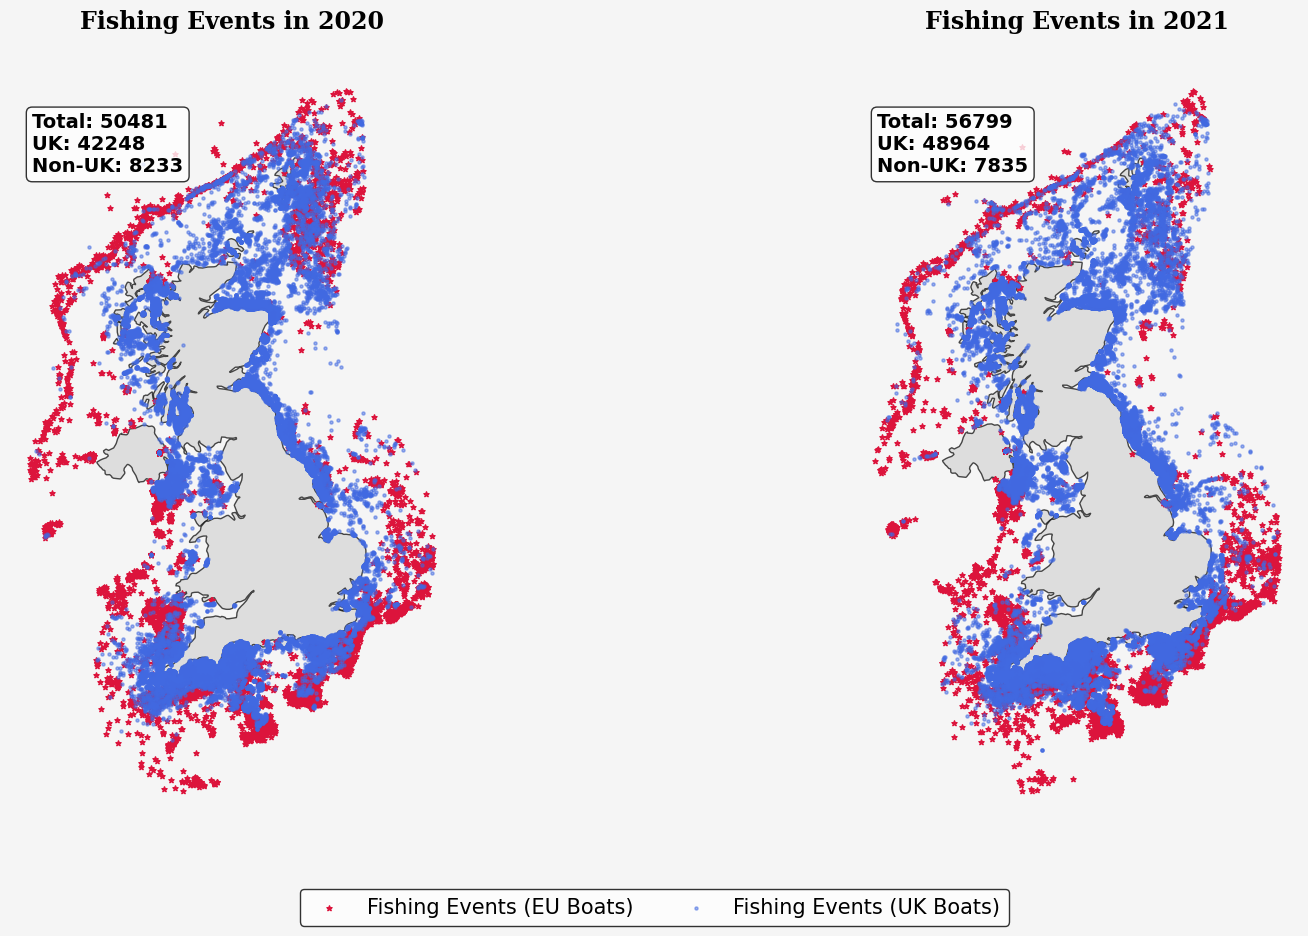

In [89]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10), facecolor='whitesmoke')

# Define colors and fonts
uk_color = 'royalblue'
non_uk_color = 'crimson'
background_color = 'lightgrey'
title_font = {'fontsize': 20, 'fontweight': 'bold', 'family': 'serif'}
subtitle_font = {'fontsize': 17, 'fontweight': 'bold', 'family': 'serif'}

# Manually specified values for port visits
values = {
    2020: {'Total': 50481, 'UK': 42248, 'Non-UK': 8233},
    2021: {'Total': 56799, 'UK': 48964, 'Non-UK': 7835}
}

for i, year in enumerate([2020, 2021]):
    # Plot UK territory
    world[world['iso3'] == 'GBR'].plot(ax=ax[i], color=background_color, edgecolor='black', alpha=0.7)
    
    # Plot port visits
    fish_data[(fish_data['year_start'] == year) & (fish_data['flag'] != 'GBR')].plot(ax=ax[i], color=non_uk_color, markersize=15, alpha=1, label='Fishing Events (EU Boats)', marker='*')
    fish_data[(fish_data['year_start'] == year) & (fish_data['flag'] == 'GBR')].plot(ax=ax[i], color=uk_color, markersize=5, alpha=0.5, label='Fishing Events (UK Boats)', marker='o')
    
    # Set title and turn off axis
    ax[i].set_title(f"Fishing Events in {year}", fontdict=subtitle_font, pad=20)
    ax[i].set_axis_off()
    
    # Annotate manually specified total port visits
    annotation = (f"Total: {values[year]['Total']}\n"
                  f"UK: {values[year]['UK']}\n"
                  f"Non-UK: {values[year]['Non-UK']}")
    ax[i].annotate(annotation, xy=(0.05, 0.85), xycoords='axes fraction', fontsize=14, fontweight='bold', 
                   bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white', alpha=0.8))

# Add a legend with a border
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, fontsize=15, frameon=True, edgecolor='black')

# Add a main title with padding
# plt.suptitle("Fishing Events by Year and Flag", fontsize=24, fontweight='bold', y=0.98, family='serif')

# Set background color
fig.patch.set_facecolor('whitesmoke')

# Add gridlines for better readability
for axis in ax:
    axis.grid(True, which='both', linestyle='--', linewidth=0.5, color='grey', alpha=0.7)

# Save and show the plot
plt.savefig(r"C:\Users\alezi\OneDrive\Escritorio\Master_Thesis\figures\thesis_fishing_events.png", bbox_inches='tight', pad_inches=0.1)
plt.show()


### Random Plots for Nachito


In [10]:
# Import world map
world = gpd.read_file(r"C:\Users\alezi\OneDrive\Escritorio\Master_Thesis\data_in\world-administrative-boundaries\world-administrative-boundaries.shp")

# Filter the countries of interest
countries = ['FRA', 'ESP', 'BEL', 'NOR', 'DEU', 'SWE', 'IRL', 'DNK', 'NLD', 'GBR']

world = world[world['iso3'].isin(countries)]

In [16]:
# Set the geodataframe of port visits
gdf = gpd.GeoDataFrame(port_visits, geometry=gpd.points_from_xy(port_visits.lon, port_visits.lat))
# Set the crs
gdf.crs = "EPSG:4326"
